In [ ]:
import os
from visuals import visualise_metric
import constants
import functionals
import pandas as pd
from pprint import pprint

In [2]:
data_path = "assignment-sample-data.csv"
df = pd.read_csv(data_path)
print(df["parking_fee"].max())
print(df["parking_fee"].min())
print(df["parking_fee"].mean())

983.0
0.0
31.78615327355439


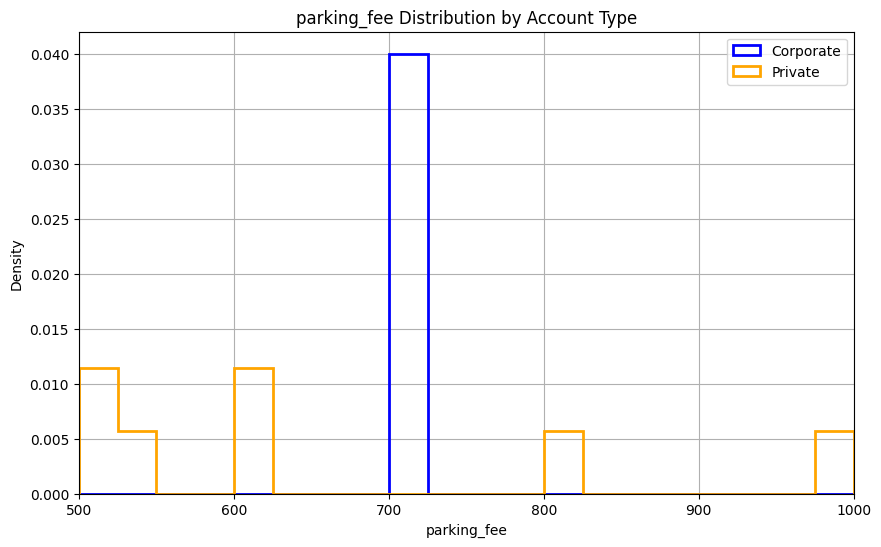

In [ ]:
visualise_metric(df, "parking_fee", x_range=(500, 1000))

In [ ]:
visualise_metric(df, "parking_fee", x_range=(500, 1000))